In [20]:
import numpy as np
import torch
from numpy import inf


In [21]:
#Format Data for KNN - 17 '
#load dataset, training and testing, examples(x) and labels(y)
train_x = torch.load("train_x.pt", map_location=torch.device('cpu')).numpy()
train_y = torch.load("train_y.pt", map_location=torch.device('cpu')).numpy()
test_x = torch.load("test_x.pt", map_location=torch.device('cpu')).numpy()
test_y = torch.load("test_y.pt", map_location=torch.device('cpu')).numpy()

from numpy.linalg import norm

#for i in range(1,152):
#    for j in range(2,17): 
#        train_x[i] = norm(train_x[i][j],2)
#        train_y[i] = norm(train_x[i][j],2)



#Format data - 
train_x = train_x.reshape(train_x.shape[0],train_x.shape[1]*train_x.shape[2])
test_x = test_x.reshape(test_x.shape[0],test_x.shape[1]*test_x.shape[2])
#train_x = train_x.reshape(train_x.shape[0],train_x.shape[1]*train_x.shape[2])[:,1::3]
#test_x = test_x.reshape(test_x.shape[0],test_x.shape[1]*test_x.shape[2])[:,1::3]


FeatureNames=['fighting','front', 'ready','cat', 'horse', 'hicho','seiza']



In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

for i in range(1,70):
    rf=RandomForestClassifier(n_estimators=i)
    rf.fit(train_x, train_y)

    y_pred = rf.predict(test_x)
    print(rf.score(test_x, test_y))
    print( confusion_matrix(test_y, y_pred), "num estimaters", i)


0.5
[[ 4  3  1  3  2  1  0]
 [ 5  9  3  5 11  0  1]
 [ 1  2 13  1  2  0  0]
 [ 2  0  3  7  1  2  0]
 [ 1  7  3  5 19  0  0]
 [ 1  0  0  1  2  6  0]
 [ 2  2  0  3  0  0 18]] num estimaters 1
0.5328947368421053
[[ 9  4  0  0  1  0  0]
 [ 7 20  1  3  2  1  0]
 [ 0  3 16  0  0  0  0]
 [ 6  4  3  2  0  0  0]
 [ 6 11  4  2 12  0  0]
 [ 4  1  0  2  0  3  0]
 [ 0  1  3  1  0  1 19]] num estimaters 2
0.5460526315789473
[[ 7  3  2  2  0  0  0]
 [10 10  1  1 12  0  0]
 [ 1  5 10  2  1  0  0]
 [ 6  3  0  4  2  0  0]
 [ 4  8  1  0 22  0  0]
 [ 1  3  0  0  0  6  0]
 [ 0  0  0  1  0  0 24]] num estimaters 3
0.631578947368421
[[ 8  1  2  1  2  0  0]
 [ 9 18  0  1  5  1  0]
 [ 1  3 12  0  3  0  0]
 [ 5  3  1  4  2  0  0]
 [ 1 11  1  0 21  1  0]
 [ 1  0  0  0  0  9  0]
 [ 0  1  0  0  0  0 24]] num estimaters 4
0.6644736842105263
[[ 6  7  0  0  1  0  0]
 [ 9 23  0  0  2  0  0]
 [ 0  6 11  0  2  0  0]
 [ 4  4  1  6  0  0  0]
 [ 2  2  6  1 24  0  0]
 [ 1  0  0  0  0  9  0]
 [ 0  1  0  2  0  0 22]] num esti

In [29]:
from sklearn import metrics
print("Accuracy: ",metrics.accuracy_score(test_y, y_pred))
print("Recall: ",metrics.recall_score(test_y, y_pred, average='weighted'))
#print("Specificity: ",metrics.accuracy_score(test_y, y_pred))
print("Precision: ",metrics.precision_score(test_y, y_pred,average='weighted'))
#print("Negative Predictive value: ",metrics.accuracy_score(test_y, y_pred))
#print("FP rate(fall-out): ",metrics.accuracy_score(test_y, y_pred))

Accuracy:  0.7302631578947368
Recall:  0.7302631578947368
Precision:  0.7453430421696676


No handles with labels found to put in legend.


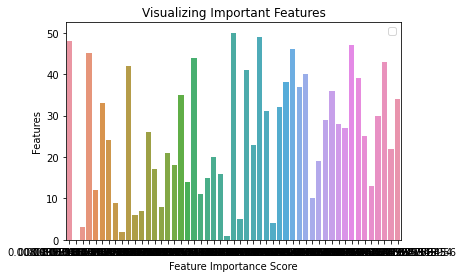

In [25]:
import pandas as pd
feature_imp = pd.Series(rf.feature_importances_).sort_values(ascending=True)
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()